In [2]:
import pandas as pd
import pandas as pd 
import numpy as np
import string
import nltk
import re 
import os 
import random 
import string
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv("../input/all-data/all_data.csv" , lineterminator='\n')

In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [6]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ه", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [7]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [8]:
def nospecial(text):
	import re
	text = re.sub("[a-zA-Z0-9]+", "",text)
	return text

In [9]:
def preprocess_text(tweet): 

    #remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    
  
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    tweet = re.sub(p_tashkeel,"", tweet)

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
     #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #remove non arabic words
    tweet = nospecial(tweet)

    #trim    
    tweet = tweet.strip()

    #   #text stemming
    # from nltk.stem.isri import ISRIStemmer
    # st = ISRIStemmer()
    # ISRIStemmer().suf32(tweet)
    
    return tweet

In [10]:
df.tweets = df.tweets.map(preprocess_text)
df.head()

,id,tweets,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون م...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [11]:
df.head()

,id,tweets,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون م...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [12]:
## Load the data to get started
import pandas as pd
import numpy as np
import tensorflow as tf
import spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import keras

In [14]:
max_fatures = 50000
tokenizer = Tokenizer(num_words = max_fatures , split=' ')
tokenizer.fit_on_texts(df['tweets'].values)
X = tokenizer.texts_to_sequences(df['tweets'].values)
X = pad_sequences(X)

In [15]:
y = pd.get_dummies(df['dialect']).values

In [16]:
embed_dim = 128
gru_out = 196

In [17]:
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [18]:
embed_dim = 128
gru_out = 196
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))

model.add(SpatialDropout1D(0.4))

model.add(GRU(gru_out, dropout=0.2, recurrent_dropout=0.2))

# model.add(tf.keras.layers.Dense(64 , activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(64 , activation='relu'))

model.add(Dense(18,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

print(model.summary())

2022-03-14 10:32:05.334437: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 86, 128)           6400000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 86, 128)           0         
_________________________________________________________________
gru (GRU)                    (None, 196)               191688    
_________________________________________________________________
dropout (Dropout)            (None, 196)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                12608     
_________________________________________________________________
dense_1 (Dense)              (None, 18)                1170      
Total params: 6,605,466
Trainable params: 6,605,466
Non-trainable params: 0
______________________________________________

In [19]:
Y = pd.get_dummies(df['dialect']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.02, random_state = 42 , shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(449033, 86) (449033, 18)
(9164, 86) (9164, 18)


In [20]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs = 10 , validation_split = 0.02 , callbacks=[checkpoint_cb, early_stopping_cb], batch_size = 2000)

2022-03-14 10:32:06.187918: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
221/221 [==============================] - 907s 4s/step - loss: 2.3051 - accuracy: 0.2689 - val_loss: 1.8117 - val_accuracy: 0.4084
Epoch 2/10
221/221 [==============================] - 900s 4s/step - loss: 1.6988 - accuracy: 0.4578 - val_loss: 1.6216 - val_accuracy: 0.4884
Epoch 3/10
221/221 [==============================] - 903s 4s/step - loss: 1.5120 - accuracy: 0.5232 - val_loss: 1.5714 - val_accuracy: 0.5075
Epoch 4/10
221/221 [==============================] - 906s 4s/step - loss: 1.4013 - accuracy: 0.5600 - val_loss: 1.5532 - val_accuracy: 0.5117
Epoch 5/10
221/221 [==============================] - 905s 4s/step - loss: 1.3228 - accuracy: 0.5843 - val_loss: 1.5507 - val_accuracy: 0.5190
Epoch 6/10
221/221 [==============================] - 908s 4s/step - loss: 1.2597 - accuracy: 0.6040 - val_loss: 1.5623 - val_accuracy: 0.5190
Epoch 7/10
221/221 [==============================] - 909s 4s/step - loss: 1.2052 - accuracy: 0.6207 - val_loss: 1.5764 - val_accuracy: 0.5192

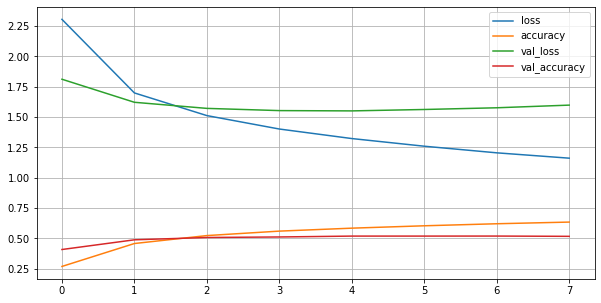

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
Y_pred = model.predict(X_test) 

In [24]:
classes_x = np.argmax(Y_pred,axis=1)

In [25]:
classes_x

array([13,  6,  8, ...,  0,  3, 13])

In [26]:
Y_pred

array([[5.2131095e-04, 1.5302848e-03, 1.5994045e-05, ..., 1.5968904e-04,
        8.1690050e-06, 7.6250214e-04],
       [3.9478023e-02, 9.6474200e-02, 7.3155219e-04, ..., 2.4197500e-03,
        1.9472546e-04, 9.4558680e-03],
       [4.5706425e-02, 2.0941878e-02, 5.6009751e-02, ..., 5.8666021e-03,
        8.5829757e-02, 4.1733548e-02],
       ...,
       [7.5763756e-01, 2.1205604e-02, 4.6626641e-03, ..., 1.5975337e-03,
        4.5708190e-03, 5.0596814e-03],
       [4.8456428e-04, 5.3591048e-05, 1.9412622e-04, ..., 8.9048535e-06,
        2.8118744e-04, 4.2954031e-05],
       [2.8737765e-02, 7.3226057e-02, 4.3826220e-03, ..., 9.5487591e-03,
        4.6637086e-03, 4.8799656e-02]], dtype=float32)

In [27]:
Y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [28]:
import numpy as np
Y_test_labels=np.argmax(Y_test, axis=1)
Y_test_labels[1]

6

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(classes_x , Y_test_labels )
cm

array([[205,  42,   4,   4,   9,  11,  39,   6,  20,   2,  34,  17,  46,
         18,   5,   3,   6,   7],
       [ 31, 141,   4,   4,   9,  13,  59,   4,   6,   2,  33,  18,  47,
         21,   4,  11,   2,  10],
       [  3,   4, 146,   5,   3,   6,   3,   6,  22,  26,   3,   3,   1,
          4,   2,   6,  19,   4],
       [ 27,  14,  31, 983,   7,  34,  24,  16,  55,  19,  13, 103,  18,
         18,  39,  16,  16,  17],
       [  4,   4,   2,   1, 143,   6,  10,   8,   5,   2,   8,   8,   5,
          5,   3,   3,   0,   4],
       [ 10,  11,   7,   2,  12, 139,  11,  15,   7,   1,   4,  66,   6,
         12,   0,  19,   2,   4],
       [ 68, 115,   9,  16,  58,  35, 429,  13,  16,   4,  43,  19,  97,
         90,   4,  11,   4,  13],
       [  5,   7,   7,   9,  14,  42,   7, 397,   9,   3,   8,  60,   2,
          7,  10,  89,   5,   7],
       [ 24,  22,  33,  27,   8,  19,  31,  12, 472,  11,  27,  31,  23,
         20,  14,  12,  20,  18],
       [  2,   3,  12,   3,   0,   4,

In [30]:
print(classification_report(Y_test_labels, classes_x))

              precision    recall  f1-score   support

           0       0.43      0.37      0.40       556
           1       0.34      0.26      0.29       538
           2       0.55      0.46      0.50       320
           3       0.68      0.86      0.76      1144
           4       0.65      0.46      0.54       311
           5       0.42      0.25      0.32       546
           6       0.41      0.54      0.47       791
           7       0.58      0.66      0.62       598
           8       0.57      0.65      0.61       725
           9       0.71      0.58      0.64       229
          10       0.38      0.31      0.34       393
          11       0.48      0.55      0.51       890
          12       0.44      0.46      0.45       632
          13       0.33      0.42      0.37       517
          14       0.64      0.52      0.57       286
          15       0.48      0.25      0.33       324
          16       0.62      0.42      0.50       183
          17       0.42    

In [31]:
import pickle
  # download tokenizer
with open('tokenizer.pickle', 'wb')as handle:
  pickle. dump(tokenizer, handle, protocol=pickle. HIGHEST_PROTOCOL)                        


In [32]:
  # loading.
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle. load(handle)

In [33]:

label_encodding = {
    0:"AE" , 
    1:"BH" ,
    2:"DZ",
    3:"EG",
    4:"IQ",
    5:"JO",
    6:"KW",
    7:"LB",
    8:"LY",
    9:"MA",
    10:"OM",
    11:"PL",
    12:"QA",
    13:"SA",
    14:"SD",
    15:"SY",
    16:"TN",
    17:"YE"}